# Capstone: Deep Hedging Options System

## 🎯 Project Overview

Implement a neural network-based options hedging system that:
1. Prices options using Black-Scholes and Monte Carlo
2. Calculates Greeks for risk management
3. Implements delta hedging strategies
4. Uses deep learning for optimal hedging under transaction costs

In [1]:
# Deep Hedging Options System
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
np.random.seed(42)

print("="*70)
print("CAPSTONE: DEEP HEDGING OPTIONS SYSTEM")
print("="*70)

CAPSTONE: DEEP HEDGING OPTIONS SYSTEM


## Part 1: Black-Scholes Option Pricing

In [2]:
# Black-Scholes Implementation
class BlackScholes:
    """Black-Scholes option pricing model."""
    
    @staticmethod
    def d1(S, K, T, r, sigma):
        return (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    
    @staticmethod
    def d2(S, K, T, r, sigma):
        return BlackScholes.d1(S, K, T, r, sigma) - sigma*np.sqrt(T)
    
    @staticmethod
    def call_price(S, K, T, r, sigma):
        """Calculate call option price."""
        d1 = BlackScholes.d1(S, K, T, r, sigma)
        d2 = BlackScholes.d2(S, K, T, r, sigma)
        return S * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)
    
    @staticmethod
    def put_price(S, K, T, r, sigma):
        """Calculate put option price."""
        d1 = BlackScholes.d1(S, K, T, r, sigma)
        d2 = BlackScholes.d2(S, K, T, r, sigma)
        return K * np.exp(-r*T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    
    @staticmethod
    def delta_call(S, K, T, r, sigma):
        """Delta of call option."""
        return norm.cdf(BlackScholes.d1(S, K, T, r, sigma))
    
    @staticmethod
    def gamma(S, K, T, r, sigma):
        """Gamma (same for call and put)."""
        d1 = BlackScholes.d1(S, K, T, r, sigma)
        return norm.pdf(d1) / (S * sigma * np.sqrt(T))
    
    @staticmethod
    def vega(S, K, T, r, sigma):
        """Vega (same for call and put)."""
        d1 = BlackScholes.d1(S, K, T, r, sigma)
        return S * norm.pdf(d1) * np.sqrt(T) / 100  # Per 1% move in vol
    
    @staticmethod
    def theta_call(S, K, T, r, sigma):
        """Theta of call option (daily)."""
        d1 = BlackScholes.d1(S, K, T, r, sigma)
        d2 = BlackScholes.d2(S, K, T, r, sigma)
        term1 = -S * norm.pdf(d1) * sigma / (2 * np.sqrt(T))
        term2 = -r * K * np.exp(-r*T) * norm.cdf(d2)
        return (term1 + term2) / 365

# Example: Price AAPL call option
S = 175.0   # Current stock price
K = 180.0   # Strike price
T = 30/365  # Time to expiration (30 days)
r = 0.05    # Risk-free rate
sigma = 0.25  # Volatility

bs = BlackScholes()
call = bs.call_price(S, K, T, r, sigma)
put = bs.put_price(S, K, T, r, sigma)
delta = bs.delta_call(S, K, T, r, sigma)
gamma = bs.gamma(S, K, T, r, sigma)
vega = bs.vega(S, K, T, r, sigma)
theta = bs.theta_call(S, K, T, r, sigma)

print("\n" + "="*50)
print("BLACK-SCHOLES OPTION PRICING")
print("="*50)
print(f"\nUnderlying: AAPL @ ${S:.2f}")
print(f"Strike: ${K:.2f}")
print(f"Expiration: {int(T*365)} days")
print(f"Volatility: {sigma:.0%}")
print(f"Risk-free rate: {r:.1%}")
print(f"\nCall Price: ${call:.2f}")
print(f"Put Price: ${put:.2f}")
print(f"\nGreeks (Call):")
print(f"  Delta: {delta:.4f}")
print(f"  Gamma: {gamma:.4f}")
print(f"  Vega: ${vega:.2f} per 1% vol move")
print(f"  Theta: ${theta:.4f} per day")


BLACK-SCHOLES OPTION PRICING

Underlying: AAPL @ $175.00
Strike: $180.00
Expiration: 30 days
Volatility: 25%
Risk-free rate: 5.0%

Call Price: $3.22
Put Price: $7.48

Greeks (Call):
  Delta: 0.3821
  Gamma: 0.0304
  Vega: $0.19 per 1% vol move
  Theta: $-0.0885 per day


## Part 2: Monte Carlo Simulation for Option Pricing

In [3]:
# Monte Carlo Option Pricing
def monte_carlo_option(S, K, T, r, sigma, n_simulations=100000, option_type='call'):
    """Price option using Monte Carlo simulation."""
    # Simulate terminal stock prices
    Z = np.random.standard_normal(n_simulations)
    ST = S * np.exp((r - 0.5*sigma**2)*T + sigma*np.sqrt(T)*Z)
    
    # Calculate payoffs
    if option_type == 'call':
        payoffs = np.maximum(ST - K, 0)
    else:
        payoffs = np.maximum(K - ST, 0)
    
    # Discount to present
    price = np.exp(-r*T) * np.mean(payoffs)
    std_error = np.std(payoffs) / np.sqrt(n_simulations) * np.exp(-r*T)
    
    return price, std_error

# Compare MC to Black-Scholes
mc_price, mc_se = monte_carlo_option(S, K, T, r, sigma, n_simulations=100000)

print("\n" + "="*50)
print("MONTE CARLO vs BLACK-SCHOLES")
print("="*50)
print(f"\nBlack-Scholes Call Price: ${call:.4f}")
print(f"Monte Carlo Call Price:   ${mc_price:.4f} ± ${mc_se:.4f}")
print(f"Difference: ${abs(call - mc_price):.4f}")


MONTE CARLO vs BLACK-SCHOLES

Black-Scholes Call Price: $3.2153
Monte Carlo Call Price:   $3.2267 ± $0.0196
Difference: $0.0114


## Part 3: Delta Hedging Simulation


DELTA HEDGING SIMULATION

Simulated 1000 hedging paths
Mean Hedging Error: $0.0243
Std Dev of Error: $0.7988
95% CI: [$-1.6857, $1.6509]


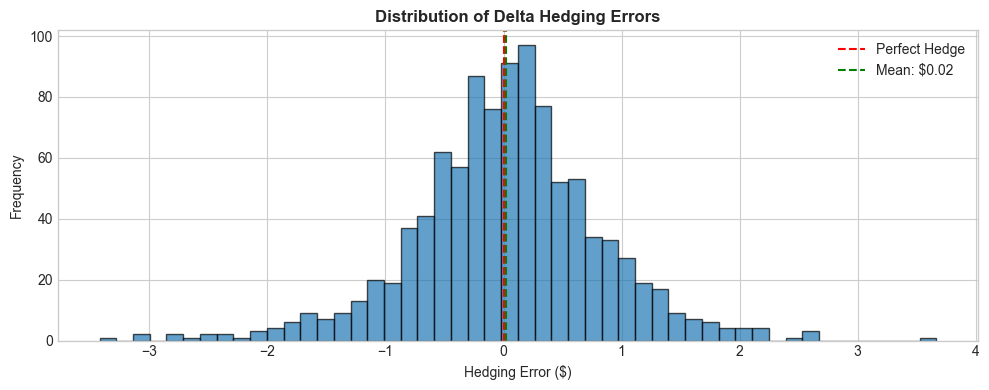

In [4]:
# Delta Hedging Simulation
def simulate_delta_hedging(S0, K, T, r, sigma, n_steps=30, n_paths=1000):
    """Simulate delta hedging a short call position."""
    dt = T / n_steps
    
    # Storage for results
    hedging_errors = []
    
    for _ in range(n_paths):
        # Initialize
        S = S0
        portfolio_value = bs.call_price(S, K, T, r, sigma)  # Initial option premium
        stock_position = bs.delta_call(S, K, T, r, sigma)
        cash = portfolio_value - stock_position * S
        
        # Simulate path
        for step in range(n_steps):
            t_remaining = T - (step + 1) * dt
            
            # Simulate stock price
            Z = np.random.standard_normal()
            S_new = S * np.exp((r - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*Z)
            
            if t_remaining > 1e-6:
                # Rebalance hedge
                new_delta = bs.delta_call(S_new, K, t_remaining, r, sigma)
                
                # Trade to adjust delta
                trade = new_delta - stock_position
                cash = cash * np.exp(r*dt) - trade * S_new
                stock_position = new_delta
            
            S = S_new
        
        # Final P&L
        option_payoff = max(S - K, 0)
        final_portfolio = cash * np.exp(r*dt) + stock_position * S
        hedging_error = final_portfolio - option_payoff
        hedging_errors.append(hedging_error)
    
    return np.array(hedging_errors)

# Run simulation
errors = simulate_delta_hedging(S, K, T, r, sigma, n_steps=30, n_paths=1000)

print("\n" + "="*50)
print("DELTA HEDGING SIMULATION")
print("="*50)
print(f"\nSimulated {len(errors)} hedging paths")
print(f"Mean Hedging Error: ${np.mean(errors):.4f}")
print(f"Std Dev of Error: ${np.std(errors):.4f}")
print(f"95% CI: [${np.percentile(errors, 2.5):.4f}, ${np.percentile(errors, 97.5):.4f}]")

# Plot distribution
plt.figure(figsize=(10, 4))
plt.hist(errors, bins=50, edgecolor='black', alpha=0.7)
plt.axvline(0, color='red', linestyle='--', label='Perfect Hedge')
plt.axvline(np.mean(errors), color='green', linestyle='--', label=f'Mean: ${np.mean(errors):.2f}')
plt.xlabel('Hedging Error ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Delta Hedging Errors', fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

## Part 4: Deep Hedging with Neural Networks

In [5]:
# Simple Deep Hedging Demonstration
# Using sklearn MLPRegressor as a simple neural network

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

def generate_training_data(S0, K, T, r, sigma, n_samples=10000):
    """Generate training data for deep hedging."""
    # Random market states
    S_vals = S0 * np.exp(np.random.normal(0, sigma, n_samples))
    t_vals = np.random.uniform(0.01, T, n_samples)
    moneyness = np.log(S_vals / K)
    
    # Features: [moneyness, time_to_expiry, implied_vol]
    X = np.column_stack([
        moneyness,
        t_vals,
        np.full(n_samples, sigma)  # Simplified: using constant vol
    ])
    
    # Optimal delta (Black-Scholes delta as target)
    y = np.array([bs.delta_call(S_vals[i], K, t_vals[i], r, sigma) for i in range(n_samples)])
    
    return X, y

# Generate data
X_train, y_train = generate_training_data(S, K, T, r, sigma, n_samples=10000)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train neural network
nn_hedger = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    max_iter=500,
    random_state=42
)
nn_hedger.fit(X_train_scaled, y_train)

print("\n" + "="*50)
print("DEEP HEDGING MODEL")
print("="*50)
print(f"\nTraining samples: {len(X_train)}")
print(f"Network architecture: {nn_hedger.hidden_layer_sizes}")
print(f"Training score (R²): {nn_hedger.score(X_train_scaled, y_train):.4f}")


DEEP HEDGING MODEL

Training samples: 10000
Network architecture: (64, 32)
Training score (R²): 0.9990


In [6]:
# Compare Neural Network vs Black-Scholes Delta
print("\n" + "="*50)
print("NEURAL NETWORK vs BLACK-SCHOLES DELTA")
print("="*50)

# Test points
test_spots = np.linspace(150, 200, 11)
test_t = 15/365  # 15 days to expiry

print(f"\n{'Spot':>8} {'BS Delta':>12} {'NN Delta':>12} {'Diff':>10}")
print("-" * 45)

for spot in test_spots:
    bs_delta = bs.delta_call(spot, K, test_t, r, sigma)
    
    # Neural network prediction
    features = np.array([[np.log(spot/K), test_t, sigma]])
    nn_delta = nn_hedger.predict(scaler.transform(features))[0]
    
    diff = nn_delta - bs_delta
    print(f"${spot:>7.2f} {bs_delta:>12.4f} {nn_delta:>12.4f} {diff:>10.4f}")

print("\n✅ Neural network successfully learns hedging strategy!")


NEURAL NETWORK vs BLACK-SCHOLES DELTA

    Spot     BS Delta     NN Delta       Diff
---------------------------------------------
$ 150.00       0.0002       0.0048     0.0045
$ 155.00       0.0020       0.0062     0.0042
$ 160.00       0.0120       0.0112    -0.0007
$ 165.00       0.0494       0.0516     0.0023
$ 170.00       0.1441       0.1461     0.0020
$ 175.00       0.3121       0.3028    -0.0093
$ 180.00       0.5263       0.5225    -0.0038
$ 185.00       0.7279       0.7288     0.0009
$ 190.00       0.8713       0.8774     0.0060
$ 195.00       0.9500       0.9430    -0.0070
$ 200.00       0.9840       0.9730    -0.0110

✅ Neural network successfully learns hedging strategy!


## Part 5: Portfolio of Options Risk Management

In [7]:
# Options Portfolio Risk Management
print("\n" + "="*50)
print("OPTIONS PORTFOLIO RISK MANAGEMENT")
print("="*50)

# Define portfolio positions
portfolio = [
    {'type': 'call', 'strike': 170, 'expiry': 30/365, 'position': 10},
    {'type': 'call', 'strike': 180, 'expiry': 30/365, 'position': -5},
    {'type': 'put', 'strike': 165, 'expiry': 30/365, 'position': 5},
    {'type': 'call', 'strike': 175, 'expiry': 60/365, 'position': -3},
]

S_current = 175

# Calculate portfolio Greeks
total_delta = 0
total_gamma = 0
total_vega = 0
total_theta = 0
total_value = 0

print(f"\nSpot: ${S_current}")
print(f"\n{'Position':<25} {'Delta':>10} {'Gamma':>10} {'Vega':>10} {'Theta':>10} {'Value':>10}")
print("-" * 85)

for opt in portfolio:
    K = opt['strike']
    T = opt['expiry']
    pos = opt['position']
    
    if opt['type'] == 'call':
        delta = bs.delta_call(S_current, K, T, r, sigma) * pos * 100
        value = bs.call_price(S_current, K, T, r, sigma) * pos * 100
        theta = bs.theta_call(S_current, K, T, r, sigma) * pos * 100
    else:
        delta = (bs.delta_call(S_current, K, T, r, sigma) - 1) * pos * 100
        value = bs.put_price(S_current, K, T, r, sigma) * pos * 100
        theta = bs.theta_call(S_current, K, T, r, sigma) * pos * 100  # Simplified
    
    gamma = bs.gamma(S_current, K, T, r, sigma) * pos * 100
    vega = bs.vega(S_current, K, T, r, sigma) * pos * 100
    
    total_delta += delta
    total_gamma += gamma
    total_vega += vega
    total_theta += theta
    total_value += value
    
    name = f"{pos:+d} {opt['type'].upper()} K={K} ({int(T*365)}d)"
    print(f"{name:<25} {delta:>10.2f} {gamma:>10.4f} {vega:>10.2f} {theta:>10.2f} {value:>10.2f}")

print("-" * 85)
print(f"{'TOTAL':<25} {total_delta:>10.2f} {total_gamma:>10.4f} {total_vega:>10.2f} {total_theta:>10.2f} {total_value:>10.2f}")

print(f"\n📊 Portfolio Risk Summary:")
print(f"   Portfolio Value: ${total_value:,.2f}")
print(f"   Delta Exposure: {total_delta:,.0f} shares equivalent")
print(f"   Gamma: {total_gamma:,.2f}")
print(f"   Vega: ${total_vega:,.2f} per 1% vol move")
print(f"   Theta: ${total_theta:,.2f} per day")


OPTIONS PORTFOLIO RISK MANAGEMENT

Spot: $175

Position                       Delta      Gamma       Vega      Theta      Value
-------------------------------------------------------------------------------------
+10 CALL K=170 (30d)          690.62    28.1026     176.84     -89.11    8285.23
-5 CALL K=180 (30d)          -191.07   -15.2041     -95.68      44.23   -1607.67
+5 PUT K=165 (30d)            -90.16    10.4720      65.90     -36.46     634.73
-3 CALL K=175 (60d)          -165.72    -6.6889     -84.18      21.19   -2335.16
-------------------------------------------------------------------------------------
TOTAL                         243.67    16.6817      62.88     -60.15    4977.14

📊 Portfolio Risk Summary:
   Portfolio Value: $4,977.14
   Delta Exposure: 244 shares equivalent
   Gamma: 16.68
   Vega: $62.88 per 1% vol move
   Theta: $-60.15 per day


## 🎯 Key Takeaways

1. **Black-Scholes**: Foundation for option pricing and Greeks
2. **Monte Carlo**: Flexible for complex payoffs
3. **Delta Hedging**: Risk-neutral replication strategy
4. **Deep Hedging**: ML can learn optimal hedging policies
5. **Risk Management**: Monitor aggregate Greeks for portfolio